[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_yolov7.ipynb)

## 0. Preperation

- Install latest version of SAHI and Torch:

In [ ]:
!pip install -U sahi
!pip install -r https://raw.githubusercontent.com/WongKinYiu/yolov7/main/requirements.txt

In [ ]:
import os
os.getcwd()

'/content'

- Import required modules:

In [ ]:
# arrange an instance segmentation model for test
from sahi.utils.yolov7 import download_yolov7_model
# import required functions, classes
from sahi.model import Yolov7DetectionModel
from sahi.predict import get_sliced_prediction, predict, get_prediction
from sahi.utils.file import download_from_url
from sahi.utils.cv import read_image
from IPython.display import Image

In [ ]:
# download yolov7 model to 'models/yolov7.pt'
yolov7_model_path = 'models/yolov7.pt'
download_yolov7_model(destination_path=yolov7_model_path)

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a Torch Hub Model

- Instantiate a torch hub model by defining model weight path, confing path and other parameters:

In [ ]:
detection_model = Yolov7DetectionModel(
    model_path=yolov7_model_path,
    confidence_threshold=0.3,
    image_size=640,
    device="cpu", # or 'cuda:0'
)

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [ ]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [ ]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

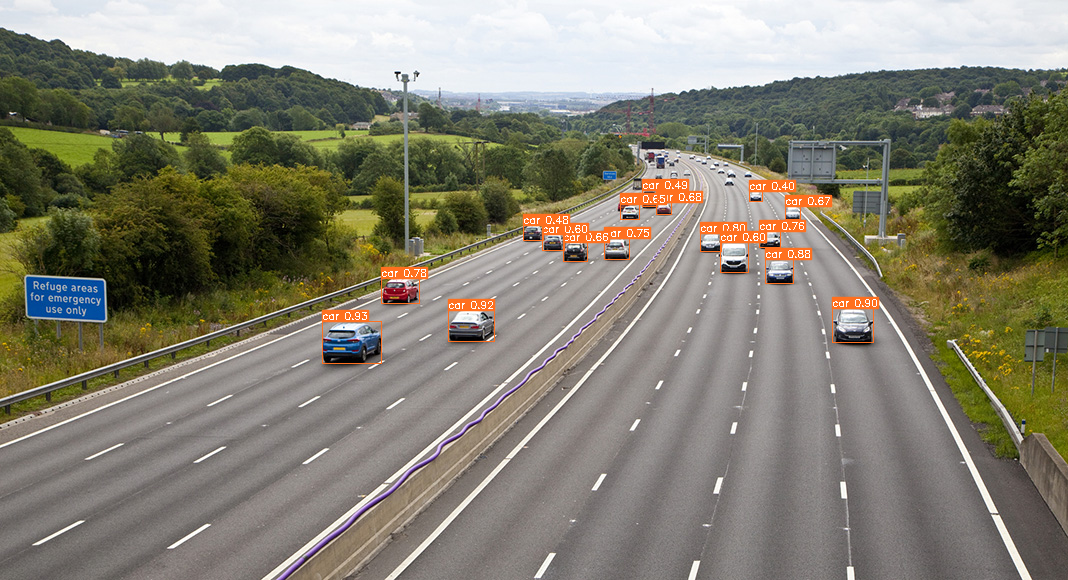

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a Torc Hub Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [ ]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)

08/04/2022 09:52:58 - WARNING - sahi.slicing -   Starting from version `0.10.2`, `auto_slice_resolution=True` is introduced as the default behavior for determining slice height and width automatically calculated by the image properties (resolution, aspect ratio and orientation).


Performing prediction on 15 number of slices.


- Visualize predicted bounding boxes and masks over the original image:

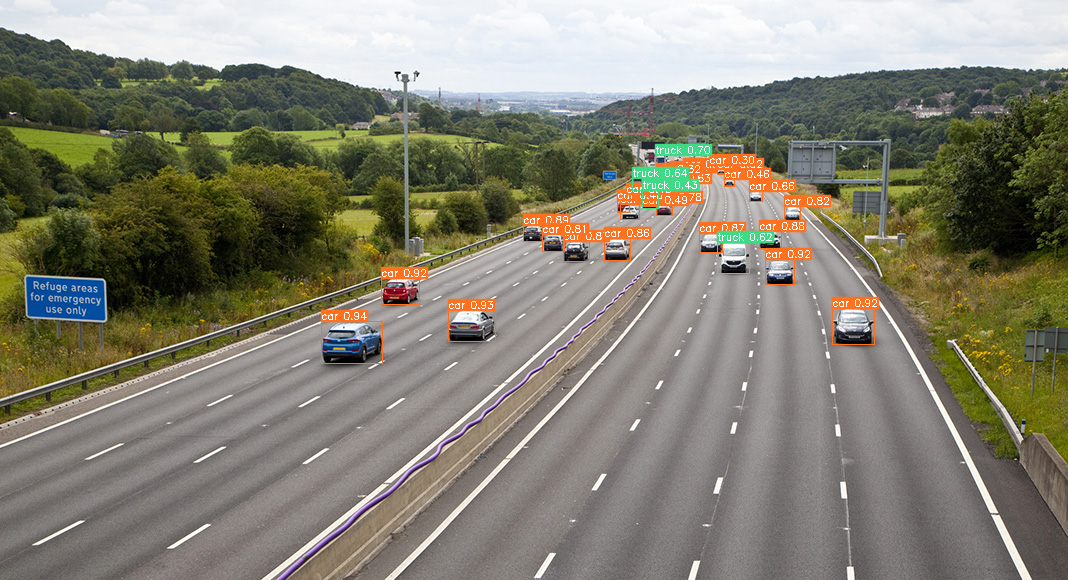

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [ ]:
object_prediction_list = result.object_prediction_list

In [ ]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(321, 321, 382, 363), w: 61, h: 42>,
    mask: None,
    score: PredictionScore: <value: 0.93896484375>,
    category: Category: <id: 2, name: car>>

In [ ]:
result.to_coco_annotations()[:3]

[{'area': 2562,
  'bbox': [321, 321, 61, 42],
  'category_id': 2,
  'category_name': 'car',
  'image_id': None,
  'iscrowd': 0,
  'score': 0.93896484375,
  'segmentation': []},
 {'area': 1457,
  'bbox': [448, 310, 47, 31],
  'category_id': 2,
  'category_name': 'car',
  'image_id': None,
  'iscrowd': 0,
  'score': 0.9287109375,
  'segmentation': []},
 {'area': 1512,
  'bbox': [832, 308, 42, 36],
  'category_id': 2,
  'category_name': 'car',
  'image_id': None,
  'iscrowd': 0,
  'score': 0.92333984375,
  'segmentation': []}]

In [ ]:
result.to_coco_predictions(image_id=1)[:3]

[{'area': 2562,
  'bbox': [321, 321, 61, 42],
  'category_id': 2,
  'category_name': 'car',
  'image_id': 1,
  'iscrowd': 0,
  'score': 0.93896484375,
  'segmentation': []},
 {'area': 1457,
  'bbox': [448, 310, 47, 31],
  'category_id': 2,
  'category_name': 'car',
  'image_id': 1,
  'iscrowd': 0,
  'score': 0.9287109375,
  'segmentation': []},
 {'area': 1512,
  'bbox': [832, 308, 42, 36],
  'category_id': 2,
  'category_name': 'car',
  'image_id': 1,
  'iscrowd': 0,
  'score': 0.92333984375,
  'segmentation': []}]

In [ ]:
!pip install -U imantics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for imantics: filename=imantics-0.1.12-py3-none-any.whl size=16033 sha256=880a308e320c4793531b3271360a9e360305218549f0459c436c04cdb9b3572f
  Stored in directory: /root/.cache/pip/wheels/da/7c/3e/296fe3ed4eb3bd713e91dee0d0549f12f316d49939a64bdc96
Successfully built imantics


In [ ]:
result.to_imantics_annotations()[:3]

## 4. Batch Prediction

- Set model and directory parameters:

In [ ]:
model_type = "yolov7"
model_path = 'models/yolov7.pt'
model_device = "cpu" # or 'cuda:0'
model_confidence_threshold = 0.5

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [ ]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


Using cache found in /root/.cache/torch/hub/WongKinYiu_yolov7_main


requirements: PyYAML>=5.3.1 not found and is required by YOLOR, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: torch!=1.12.0,>=1.7.0 not found and is required by YOLOR, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: torchvision!=0.13.0,>=0.8.1 not found and is required by YOLOR, attempting auto-update...


08/04/2022 09:53:28 - INFO - models.yolo -   
                 from  n    params  module                                  arguments                     
08/04/2022 09:53:28 - INFO - models.yolo -     0                -1  1       928  models.common.Conv                      [3, 32, 3, 1]                 
08/04/2022 09:53:28 - INFO - models.yolo -     1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
08/04/2022 09:53:28 - INFO - models.yolo -     2                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
08/04/2022 09:53:28 - INFO - models.yolo -     3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
08/04/2022 09:53:28 - INFO - models.yolo -     4                -1  1      8320  models.common.Conv                      [128, 64, 1, 1]               
08/04/2022 09:53:28 - INFO - models.yolo -     5                -2  1      8320  models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 3 packages updated per /root/.cache/torch/hub/WongKinYiu_yolov7_main/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



08/04/2022 09:53:28 - INFO - models.yolo -     8                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
08/04/2022 09:53:28 - INFO - models.yolo -     9                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
08/04/2022 09:53:28 - INFO - models.yolo -    10  [-1, -3, -5, -6]  1         0  models.common.Concat                    [1]                           
08/04/2022 09:53:28 - INFO - models.yolo -    11                -1  1     66048  models.common.Conv                      [256, 256, 1, 1]              
08/04/2022 09:53:28 - INFO - models.yolo -    12                -1  1         0  models.common.MP                        []                            
08/04/2022 09:53:28 - INFO - models.yolo -    13                -1  1     33024  models.common.Conv                      [256, 128, 1, 1]              
08/04/2022 09:53:28 - INFO - models.yolo -    14                -3  1     33024  models.

Adding autoShape... 


Performing inference on images:   0%|          | 0/3 [00:00<?, ?it/s]

Performing prediction on 15 number of slices.


Performing inference on images:  33%|███▎      | 1/3 [00:00<00:01,  1.71it/s]

Prediction time is: 514.38 ms
Performing prediction on 20 number of slices.


Performing inference on images:  67%|██████▋   | 2/3 [00:01<00:00,  1.64it/s]

Prediction time is: 563.04 ms
Performing prediction on 15 number of slices.


Performing inference on images: 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]

Prediction time is: 420.12 ms
Prediction results are successfully exported to runs/predict/exp
